# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

## Objectives
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.



### Importing Required Libraries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Download Data
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"


download(file_path, "insurance.csv")
file_name="insurance.csv"
df = pd.read_csv(file_name, header=0)

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file.

Print the first 10 rows of the dataframe to confirm successful loading.


In [6]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [7]:
#Add the headers to the dataframe, as mentioned in the project scenario.
headers= ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns =headers

df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [12]:
#Now, replace the '?' entries with 'NaN' values.

df.replace('?', np.nan, inplace= True)

# Task 2 : Data Wrangling
Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info().

In [14]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoker, inplace = True)
# age is a continuous variable, replace with mean age

mean_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, mean_age, inplace=True)

#update data types

df[['age', "smoker"]] = df[['age', "smoker"]].astype("int64")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


<ipython-input-14-e31457346e05>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, is_smoker, inplace = True)
<ipython-input-14-e31457346e05>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [15]:
# the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`.


(0.0, 66902.85800000001)

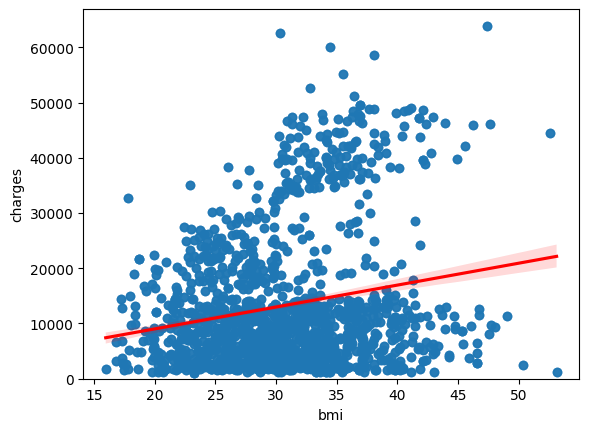

In [16]:
sns.regplot(x='bmi', y='charges', data =df, line_kws={"color": "red"})

plt.ylim(0, )

(0.0, 66902.85800000001)

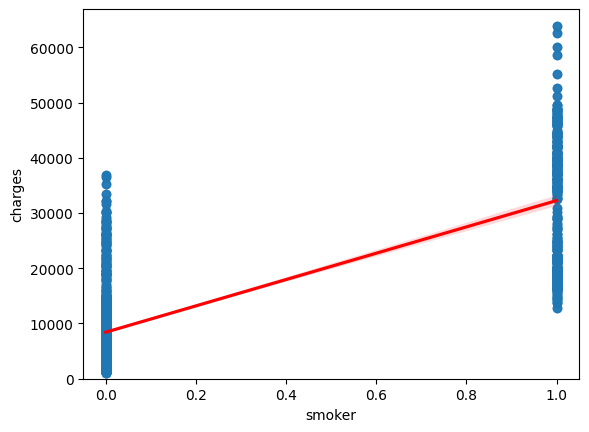

In [17]:
sns.regplot(x="smoker", y="charges", data =df, line_kws={"color":"red"})

plt.ylim(0, )

<Axes: xlabel='smoker', ylabel='charges'>

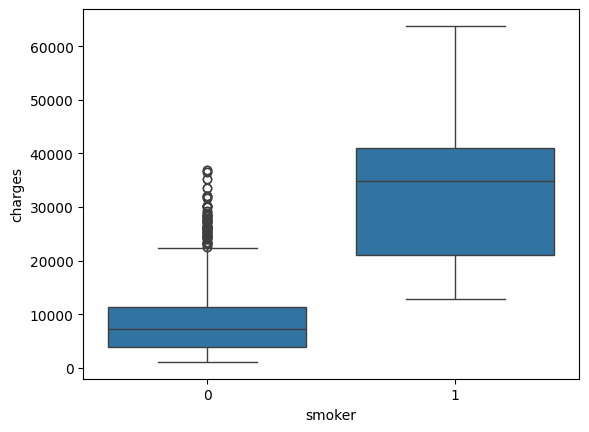

In [18]:
#Implement the box plot for `charges` with respect to `smoker`.
sns.boxplot(x='smoker', y='charges', data =df)

In [34]:
#Print the correlation matrix for the dataset.

print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [23]:
X= df[['smoker']]
Y= df[['charges']]
lm= LinearRegression()

lm.fit(X, Y)

Yhat=lm.predict(X)

print(lm.score(X, Y))

0.6227430402464125


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the
 score of this model. You should see an improvement in the performance.

In [25]:
Z= df[['age', 'bmi','no_of_children', 'smoker']]
Y=df[['charges']]

lm.fit(Z, Y)

yhat=lm.predict(Z)

print(lm.score(Z, Y))

0.749735346452784


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [27]:
Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
Pipe= Pipeline(Input)

Z= Z.astype(float)
Pipe.fit(Z, Y)

ypipe= Pipe.predict(Z)
print(r2_score(Y, ypipe))

0.842812100889921


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state =1)

In [30]:
#Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.

RidgeModel =Ridge(alpha = 0.1)

RidgeModel.fit(X_train, Y_train)

yhat = RidgeModel.predict(X_test)

print(r2_score(Y_test, yhat))


0.7253451652763545


In [32]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
RidgeModel.fit(X_train_pr, Y_train)
y_hat = RidgeModel.predict(X_test_pr)
print(r2_score(Y_test,y_hat))

0.8182504542573504
